<a href="https://colab.research.google.com/github/psst54/startTensorflow/blob/master/ch7_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = []
Y = []
for i in range(6):
    lst = list(range(i, i + 4))
    X.append(list(map(lambda c: [c / 10], lst)))
    Y.append((i + 4) / 10)

X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units = 10, return_sequences = False, input_shape = [4, 1]),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(X, Y, epochs = 100, verbose = 0)
print(model.predict(X))

[[0.35967624]
 [0.5086048 ]
 [0.6324443 ]
 [0.73008966]
 [0.8033989 ]
 [0.85533434]]


In [9]:
print(model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]])))
print(model.predict(np.array([[[-0.1], [0.0], [0.1], [0.2]]])))

[[0.8890169]]
[[0.19165012]]


In [11]:
X = []
Y = []

import random

for i in range(3000):
    lst = np.random.rand(100)
    idx = np.random.choice(100, 2, replace = False)
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.46865515]
 [0.         0.95238032]
 [0.         0.89510247]
 [0.         0.99053797]
 [0.         0.61062034]
 [0.         0.1991188 ]
 [0.         0.46122955]
 [0.         0.89678619]
 [0.         0.25041674]
 [0.         0.38372844]
 [0.         0.85899775]
 [0.         0.8878245 ]
 [0.         0.03127324]
 [0.         0.82522113]
 [0.         0.94550307]
 [0.         0.78709255]
 [0.         0.85967475]
 [0.         0.87392965]
 [0.         0.20234853]
 [0.         0.40231437]
 [0.         0.22823   ]
 [1.         0.8269114 ]
 [0.         0.2863028 ]
 [0.         0.51405815]
 [0.         0.86881633]
 [0.         0.67187023]
 [0.         0.92617594]
 [0.         0.80886832]
 [0.         0.89687913]
 [0.         0.56058276]
 [0.         0.19799237]
 [0.         0.97079022]
 [0.         0.77891362]
 [0.         0.73219618]
 [0.         0.58906636]
 [0.         0.20374746]
 [0.         0.9337083 ]
 [0.         0.41422313]
 [0.         0.5013804 ]
 [0.         0.83325172]


In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units = 30, return_sequences = True, input_shape = [100, 2]),
                             tf.keras.layers.SimpleRNN(units = 30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
import numpy as np

X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs = 100, validation_split = 0.2)

Epoch 1/100
64/64 [==============================] - 5s 81ms/step - loss: 0.0516 - val_loss: 0.0555
Epoch 2/100
64/64 [==============================] - 5s 76ms/step - loss: 0.0482 - val_loss: 0.0467
Epoch 3/100
64/64 [==============================] - 5s 77ms/step - loss: 0.0490 - val_loss: 0.0469
Epoch 4/100
64/64 [==============================] - 5s 77ms/step - loss: 0.0470 - val_loss: 0.0463
Epoch 5/100
64/64 [==============================] - 5s 76ms/step - loss: 0.0482 - val_loss: 0.0476
Epoch 6/100
64/64 [==============================] - 5s 76ms/step - loss: 0.0476 - val_loss: 0.0466
Epoch 7/100
64/64 [==============================] - 5s 76ms/step - loss: 0.0469 - val_loss: 0.0464
Epoch 8/100
64/64 [==============================] - 5s 77ms/step - loss: 0.0475 - val_loss: 0.0467
Epoch 9/100
64/64 [==============================] - 5s 77ms/step - loss: 0.0478 - val_loss: 0.0476
Epoch 10/100
64/64 [==============================] - 5s 78ms/step - loss: 0.0472 - val_loss: 0.0463

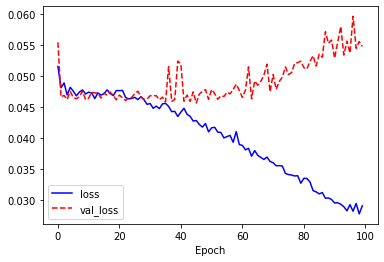

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

for i in range(5):
    print(Y[2560 + i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560 + i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 0.04 이상 오차가 생길 경우, 오답
    if (abs(prediction[i][0] - Y[2560 + i]) > 0.04):
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 0s 12ms/step - loss: 0.0611
0.163990764643513 	 0.13965684 	diff: 0.024333922888599674
0.11740240106813 	 0.30594662 	diff: 0.18854421725042775
0.0026173611026538627 	 0.21048734 	diff: 0.20786997481768
0.0218096671505634 	 0.1539724 	diff: 0.13216273506444057
0.7460436646432339 	 0.17310405 	diff: 0.5729396168679654
correctness: 9.545454545454547 %


In [18]:
# LSTM layer

model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units = 30, return_sequences = True, input_shape = [100, 2]),
                             tf.keras.layers.LSTM(units = 30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [19]:
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs = 100, validation_split = 0.2)

Epoch 1/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0496 - val_loss: 0.0452
Epoch 2/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0466 - val_loss: 0.0462
Epoch 3/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0464 - val_loss: 0.0471
Epoch 4/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0463 - val_loss: 0.0454
Epoch 5/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0464 - val_loss: 0.0454
Epoch 6/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0466 - val_loss: 0.0461
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0469 - val_loss: 0.0476
Epoch 8/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0467 - val_loss: 0.0477
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0461 - val_loss: 0.0455
Epoch 10/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0461 - val_loss: 0.0455
Ep

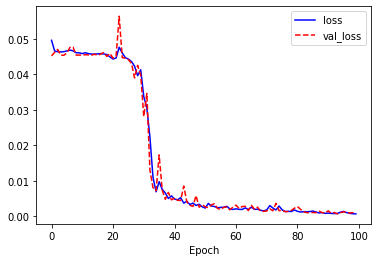

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560 + 5])
for i in range(5):
    print(Y[2560 + i], '\t', prediction[i][0], '\tdiff', abs(prediction[i][0] - Y[2560 + i]))

prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if (abs(prediction[i][0] - Y[2560 + i]) > 0.04):
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 5ms/step - loss: 9.2586e-04
0.163990764643513 	 0.09667111 	diff 0.06731965276178006
0.11740240106813 	 0.10239544 	diff 0.015006963410296906
0.0026173611026538627 	 0.0014322996 	diff 0.001185061488701226
0.0218096671505634 	 0.02490516 	diff 0.0030954929189022373
0.7460436646432339 	 0.6767134 	diff 0.06933025760359157
correctness: 86.13636363636363 %


In [23]:
# GRU

model = tf.keras.Sequential([
                             tf.keras.layers.GRU(units = 30, return_sequences = True, input_shape = [100, 2]),
                             tf.keras.layers.GRU(units = 30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 100, 30)           3060      
_________________________________________________________________
gru_3 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [24]:
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs = 100, validation_split = 0.02)

Epoch 1/100
79/79 [==============================] - 1s 17ms/step - loss: 0.0506 - val_loss: 0.0577
Epoch 2/100
79/79 [==============================] - 1s 11ms/step - loss: 0.0467 - val_loss: 0.0579
Epoch 3/100
79/79 [==============================] - 1s 11ms/step - loss: 0.0466 - val_loss: 0.0580
Epoch 4/100
79/79 [==============================] - 1s 11ms/step - loss: 0.0461 - val_loss: 0.0582
Epoch 5/100
79/79 [==============================] - 1s 11ms/step - loss: 0.0461 - val_loss: 0.0596
Epoch 6/100
79/79 [==============================] - 1s 11ms/step - loss: 0.0461 - val_loss: 0.0583
Epoch 7/100
79/79 [==============================] - 1s 11ms/step - loss: 0.0466 - val_loss: 0.0583
Epoch 8/100
79/79 [==============================] - 1s 11ms/step - loss: 0.0462 - val_loss: 0.0583
Epoch 9/100
79/79 [==============================] - 1s 11ms/step - loss: 0.0460 - val_loss: 0.0581
Epoch 10/100
79/79 [==============================] - 1s 12ms/step - loss: 0.0457 - val_loss: 0.0585

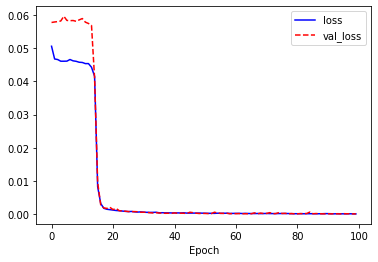

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [26]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560 + 5])
for i in range(5):
    print(Y[2560 + i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560 + i]))

prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(X[2560:])):
    if (abs(prediction[i][0] - Y[2560 + i]) > 0.04):
        cnt += 1

print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 4ms/step - loss: 7.3496e-05
0.163990764643513 	 0.15824643 	diff: 0.005744336869083683
0.11740240106813 	 0.12592858 	diff: 0.008526179692825805
0.0026173611026538627 	 -0.012899525 	diff: 0.015516886566234948
0.0218096671505634 	 0.027744427 	diff: 0.00593476017277797
0.7460436646432339 	 0.73083174 	diff: 0.015211922356551777
correctness: 99.77272727272727 %
